In [49]:
import random as rand
import math
import matplotlib.pyplot as plt
import numpy as np

# Normal distribution

density:
\begin{equation*}
p(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
\end{equation*}
Where $\mu$ - expectation of the distribution, $\sigma^2$ - variance.

$\mathcal{N}(0, 1)$ is called standard normal distribution.

In [50]:
def normal_density(x, mu=0, sigma=1):
    return 1 / math.sqrt(2 * sigma**2 * math.pi) * math.exp(- (x - mu)**2 / 2 * sigma*sigma)

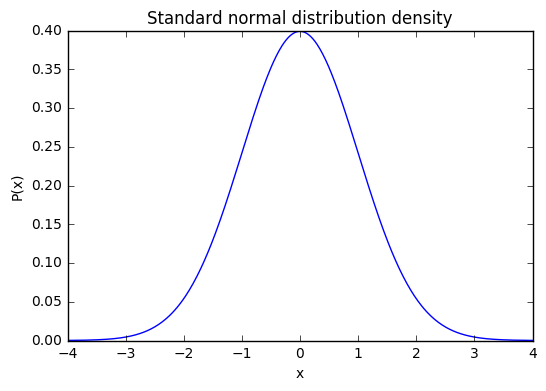

In [51]:
def draw_normal_density(mu=0, sigma=1, size=500, range_start=-4, range_stop=4, color='b'):
    normal_dens = np.zeros(size)
    x_axis = np.linspace(range_start, range_stop, num=size)
    for i in range(size):
        normal_dens[i] = normal_density(x_axis[i], mu, sigma)
    plt.plot(x_axis, normal_dens, color)

draw_normal_density()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Standard normal distribution density')
plt.show()

## Sampling from a normal distribution

Normal variate $s$:
\begin{equation*}
s = \mu + \sigma(\sum_{i=1}^{12} R_i - 6)
\end{equation*}
<p>
Where $\mu$ - expectation of the normal distribution, $\sigma$ - standard deviation, $R_i$ - uniformly distributed random number.
<p>
This follows as a corollary of the **central limit theorem**.

(see also *Box–Muller transform* for generating normally distributed random numbers).

In [52]:
def normal_variate(mu=0, sigma=1):
    uniform_variates = 0
    for uniform_i in range(12):
        uniform_variates += rand.random()
    return mu + sigma * (uniform_variates - 6)
    

def normal_variates(size, mu=0, sigma=1):    
    normal_variates = np.zeros(size)
    for normal_i in range(size):
        normal_variates[normal_i] = normal_variate(mu, sigma)
    return normal_variates

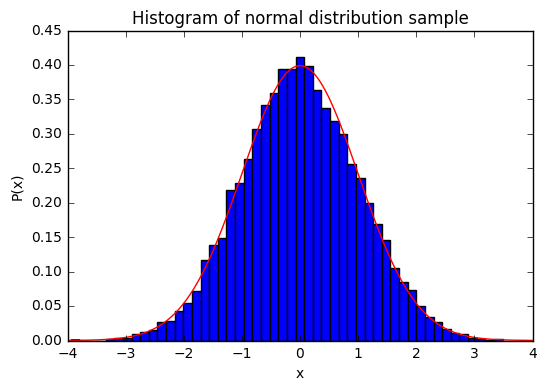

In [53]:
sample_size = 10000
mu, sigma = 0, 1
norm_sample = normal_variates(sample_size)

num_bins = 50
plt.hist(norm_sample, num_bins, normed=True)
# add a 'best fit' line
draw_normal_density(color='r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Histogram of normal distribution sample')
plt.show()

# Non-standardized Student's t-distribution

density:
\begin{equation*}
p(x\mid \nu,\mu,\sigma^2) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}} \left(1+\frac{1}{\nu}\frac{(x-\mu)^2}{\sigma^2}\right)^{-\frac{\nu+1}{2}}
\end{equation*}
<p>
Where $\nu$ - degrees of freedom, $\mu$ - location parameter, $\sigma^2$ - squared scale parameter, and $\Gamma$ is the gamma function:
<p>
\begin{equation*}
\Gamma(n) = (n-1)!,
\end{equation*}
when $n\in\mathbb{N}$ (*if $n\in\mathbb{R}$ or $n\in\mathbb{C}$ see gamma function definition*).

In [54]:
def t_density(x, nu, mu=0, sigma=1):
    return math.gamma((nu + 1) / 2) / (math.gamma(nu / 2) * math.sqrt(math.pi * nu) * sigma) * \
    (1 + 1 / nu * (x - mu)**2 / sigma**2)**(-(nu + 1) / 2)

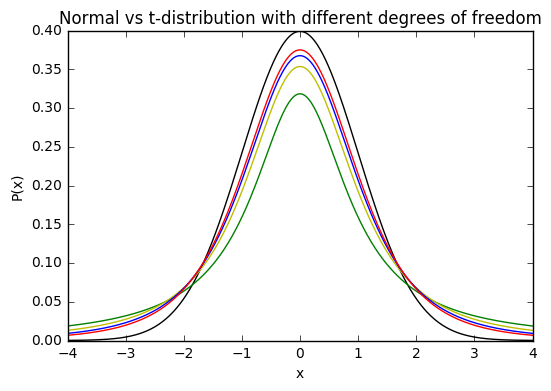

In [55]:
size = 500
normal_dens = np.zeros(size)
t_dens1 = np.zeros(size)
t_dens2 = np.zeros(size)
t_dens3 = np.zeros(size)
t_dens4 = np.zeros(size)
x_axis = np.linspace(-4, 4, num=size)
for i in range(size):
    normal_dens[i] = normal_density(x_axis[i])
    t_dens1[i] = t_density(x_axis[i], 1)
    t_dens2[i] = t_density(x_axis[i], 2)
    t_dens3[i] = t_density(x_axis[i], 3)
    t_dens4[i] = t_density(x_axis[i], 4)
plt.plot(x_axis, normal_dens, 'black')
plt.plot(x_axis, t_dens1, 'g')
plt.plot(x_axis, t_dens2, 'y')
plt.plot(x_axis, t_dens3, 'b')
plt.plot(x_axis, t_dens4, 'r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Normal vs t-distribution with different degrees of freedom')
plt.show()

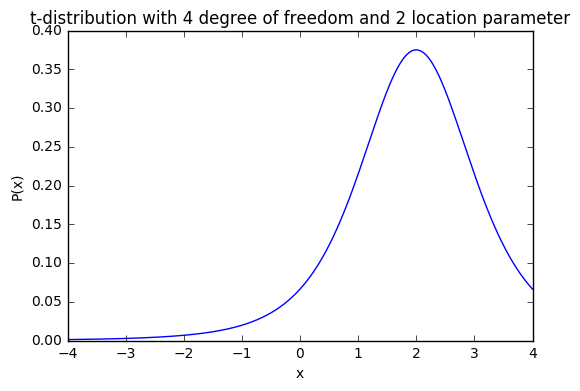

In [56]:
def draw_t_density(degrees_of_freedom, location_parameter, size=500, range_start=-4, range_stop=4, color='b'):
    t_dens = np.zeros(size)
    x_axis = np.linspace(range_start, range_stop, num=size)
    for i in range(size):
        t_dens[i] = t_density(x_axis[i], degrees_of_freedom, mu=location_parameter)
    plt.plot(x_axis, t_dens, color)

draw_t_density(4, 2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('t-distribution with 4 degree of freedom and 2 location parameter')
plt.show()

## Sampling from a t-distribution

\begin{equation*}
t=\frac{ \bar X - \mu} {S/\sqrt n}
\end{equation*}
<p>
Where $\bar X$ - sample mean of independent normally distributed $X_1,...X_n$, $\mu$ - expectation of the normal distribution, $S^2$ - sample variance and n - 1 degrees of freedom.
<p>
\begin{equation*}
\bar X = \frac 1 n \sum_{i=1}^n X_i
\end{equation*}
<p>
\begin{equation*}
S^2 = \frac 1 {n-1} \sum_{i=1}^n (X_i - \bar X)^2
\end{equation*}
<p>
Non-standardized t-distribution
\begin{equation*}
t^* = \mu^* + \sigma^* t
\end{equation*}
$\mu^*$ - location parameter, $\sigma^*$ - scale parameter

In [57]:
def mean(x):
    return 1 / x.size * np.sum(x)

def sample_variance(x):
    return 1 / (x.size - 1) * np.sum((x - mean(x))**2)

def t_variate(x, mu=0, location_parameter=0, scale_parameter=1):
    return ((mean(x) - mu) / (math.sqrt(sample_variance(x)) / math.sqrt(x.size))) * \
    scale_parameter + location_parameter

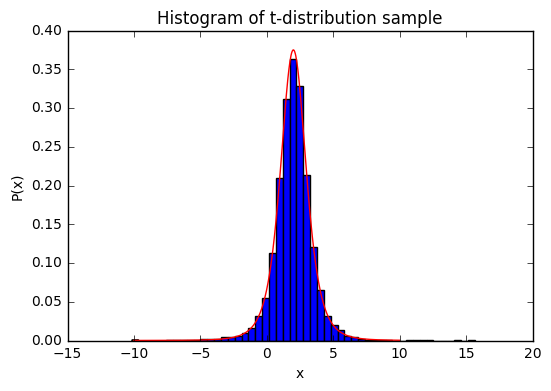

In [58]:
sample_size = 10000
mu, sigma = 0, 1
degrees_of_freedom = 4
location_parameter = 2
t_sample = np.zeros(sample_size)
for i in range(sample_size):
    norm_vars = normal_variates(degrees_of_freedom + 1, mu, sigma)
    t_sample[i] = t_variate(norm_vars, mu, location_parameter)

num_bins = 50
plt.hist(t_sample, num_bins, normed=True)
draw_t_density(degrees_of_freedom, location_parameter, range_start=-10, range_stop=10, color='r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Histogram of t-distribution sample')
plt.show()